# Transformation of Features
Why Transformation of Features Are Required?

In LR: we have to find the coffeicient, and it will found by gradient desecent, if we donot do transformation, it will affect the step size of and it might we will not find converage.

All model based on the Eculiean distance will affect, if we donot do transformation 

Linear Regression---Gradient Descent ----Global Minima

Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

SVM ---- maximize the marginal distance 

### Types Of Transformation

1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation: Logarithmic Transformation,
Reciprocal Trnasformation,
Square Root Transformation,
,Exponential Trnasformation
,Box Cox Transformation

## 1. Standardization(Why standardization?)
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

**Mean is zero and std of 1**

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

In [5]:
import pandas as pd
df=pd.read_csv('titanic_train.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [6]:
# finding missing value
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [9]:
### Independent and dependent features
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### fit transform
fit_transform came in the picture when we do vraibles transformation or any kind of transformation
##### fit 
 fit is used for machine learning algorithm

In [12]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train) #alway give parameter in fit_transform

In [13]:
X_train_scaled

array([[-1.62580285,  1.88957013,  0.38784185],
       [ 0.80576177,  0.01073573, -0.31908053],
       [-0.41002054, -0.35257881,  0.18792449],
       ...,
       [ 0.80576177,  0.88446888, -0.34613654],
       [-1.62580285, -1.2030491 ,  1.71250117],
       [-1.62580285, -0.66184074,  0.8821286 ]])

In [33]:
scaled_train=pd.DataFrame(X_train_scaled)
#df_columns= pd.DataFrame(X.columns)
#scaled_train=pd.concat([scaled_train,df_columns],axis=1)
#scaled_train.columns=['Survived','Pclass','Age','Fare']
scaled_train

,0,1,2
0,-1.625803,1.889570,0.387842
1,0.805762,0.010736,-0.319081
2,-0.410021,-0.352579,0.187924
3,0.805762,-0.275263,-0.339412
4,0.805762,-0.584525,-0.415961
...,...,...,...
591,0.805762,-0.661841,-0.471692
592,-1.625803,0.010736,-0.017745
593,0.805762,0.884469,-0.346137
594,-1.625803,-1.203049,1.712501


In [14]:
#only transform the test data
X_test_scaled=scaler.transform(X_test)

In [15]:
X_test_scaled

array([[ 0.80576177,  0.01073573, -0.32402243],
       [-0.41002054,  0.11131407, -0.4162854 ],
       [ 0.80576177, -0.73915622, -0.46634591],
       [-0.41002054, -1.82157295,  0.0211365 ],
       [ 0.80576177, -1.2030491 , -0.40186603],
       [-1.62580285, -0.27526333,  0.91250512],
       [ 0.80576177,  0.01073573, -0.46974808],
       [ 0.80576177, -1.04841814, -0.2704781 ],
       [ 0.80576177, -1.04841814, -0.46974808],
       [-1.62580285, -0.8164717 , -0.10944269],
       [-1.62580285,  0.57520696,  0.41190006],
       [ 0.80576177,  1.11641532, -0.46391578],
       [ 0.80576177,  0.01073573, -0.12531819],
       [ 0.80576177,  0.03399859, -0.47995459],
       [-0.41002054,  0.49789148, -0.36768297],
       [-1.62580285, -1.04841814,  0.14555873],
       [-1.62580285,  0.96178436,  0.40128918],
       [ 0.80576177,  0.01073573, -0.46820835],
       [-0.41002054, -0.19794785, -0.36768297],
       [-1.62580285,  1.34836176,  0.39051499],
       [ 0.80576177, -0.4298943 , -0.466

#### Model Building
##### fit() for training and predict for test

In [22]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()
classification.fit(X_train_scaled,y_train)

LogisticRegression()

In [23]:
classification.predict(X_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

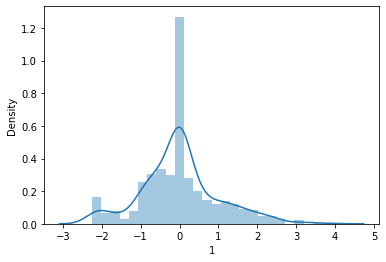

In [35]:
import seaborn as sns
sns.distplot(scaled_train[1])

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2', ylabel='Density'>

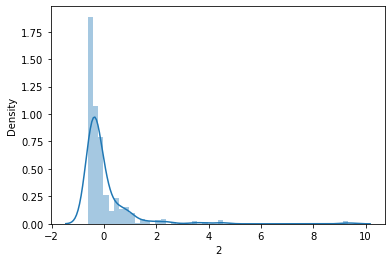

In [36]:
import seaborn as sns
sns.distplot(scaled_train[2])

## 2. Min Max Scaling (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1. 

X_scaled = (X - X.min / (X.max - X.min)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax_train=pd.DataFrame(min_max.fit_transform(X_train))
df_minmax_train.head()

,0,1,2
0,0.0,0.673285,0.101229
1,1.0,0.367921,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


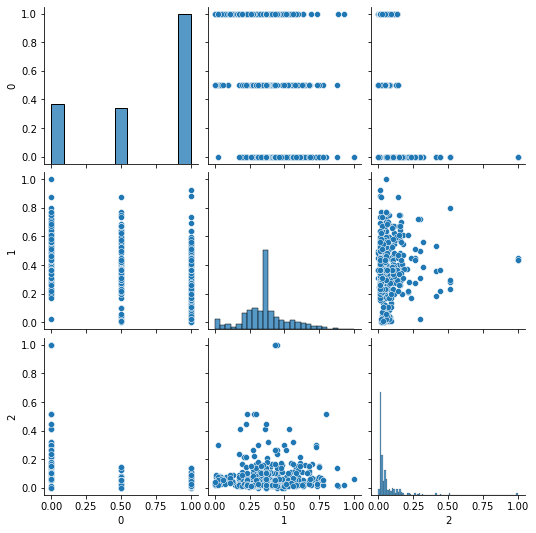

In [44]:
sns.pairplot(df_minmax_train)

(array([ 29.,   9.,   9.,  23.,  50.,  63.,  62., 174.,  50.,  25.,  24.,
         27.,  16.,  15.,  10.,   5.,   0.,   3.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

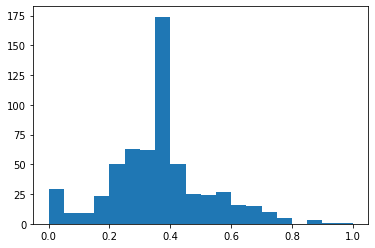

In [45]:
import matplotlib.pyplot as plt
plt.hist(df_minmax_train[1],bins=20)

## Robust Scaler
Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(X_train))
df_robust_scaler.head()


,0,1,2
0,-2.0,1.869299,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.361471,1.161670
3,0.0,-0.284548,0.000000
4,0.0,-0.592240,-0.168630


In [49]:
scaler.transform(X_test)

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  1.00067873e-01, -1.69344754e-01],
       [ 0.00000000e+00, -7.46085973e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.82300905e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.20762443e+00, -1.37580300e-01],
       [-2.00000000e+00, -2.84547511e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -1.05377828e+00,  1.51854390e-01],
       [ 0.00000000e+00, -1.05377828e+00, -2.87117773e-01],
       [-2.00000000e+00, -8.23009050e-01,  5.06599572e-01],
       [-2.00000000e+00,  5.61606335e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.10006787e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  2.31447964e-02, -3.09601713e-01],
       [-1.00000000e+00,  4.84683258e-01, -6.22783726e-02],
       [-2.00000000e+00, -1.05377828e+00,  1.06834261e+00],
       [-2.00000000e+00,  9.46221719e-01

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

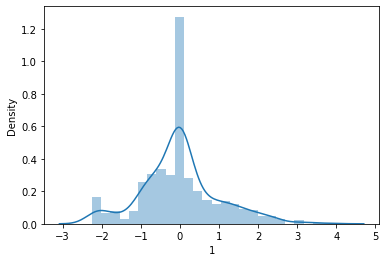

In [54]:
sns.distplot(df_robust_scaler[1])

## 4. Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation


In [57]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [58]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

In [59]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [60]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 

In [61]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

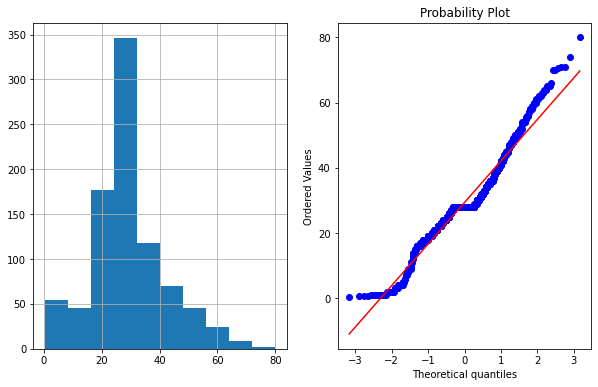

In [62]:
plot_data(df,'Age')

#### Logarithmic Transformation

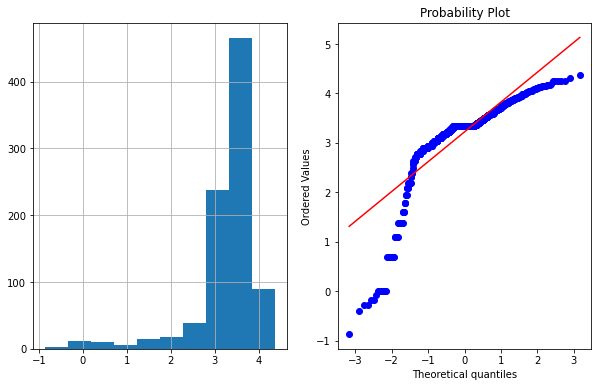

In [63]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

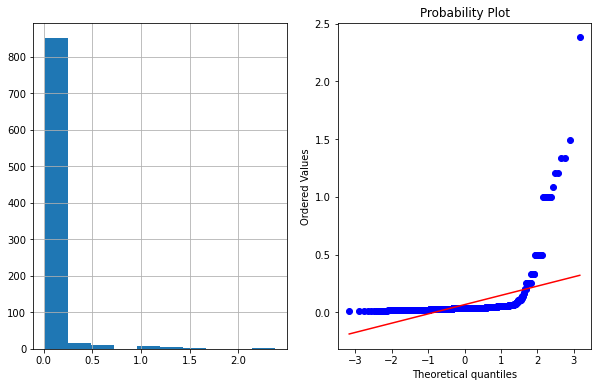

In [64]:
#reciprocal
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

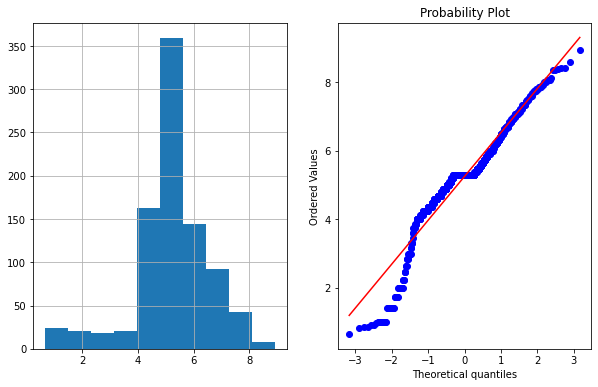

In [65]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

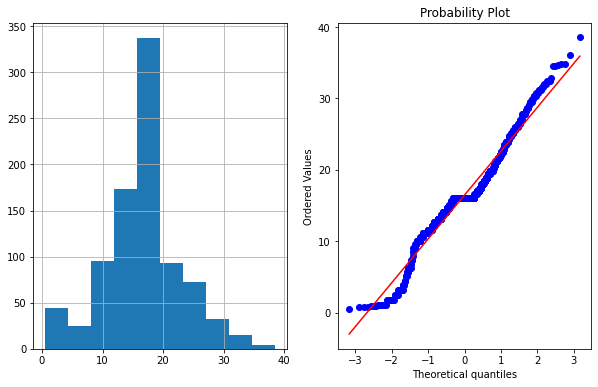

In [66]:
#### Exponential Transdormation
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

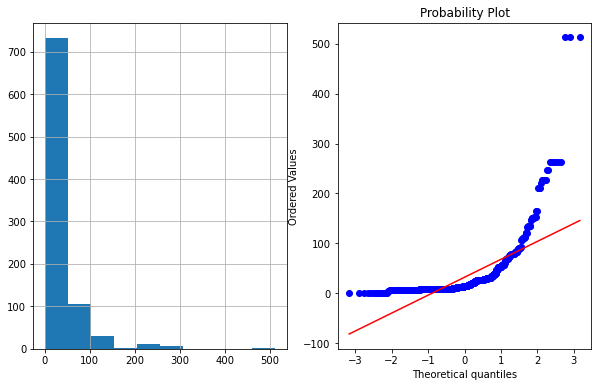

In [67]:
plot_data(df,'Fare')

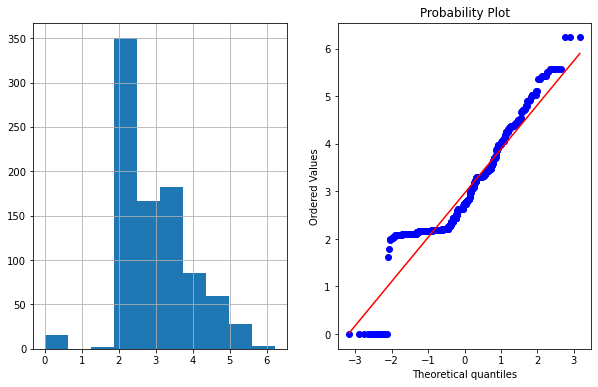

In [68]:
#### Fare
df['Fare_log']=np.log1p(df['Fare']) #we use log1p--- beacuse log 0 is nit defined 
plot_data(df,'Fare_log')